# Logistic Regression : Glass Identification Problem

# Predicting a Continuous Response

# Glass Identification Dataset

In [1]:
# #Dataset information

# 1. Id number: 1 to 214 
# 2. RI: refractive index 
# 3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) 
# 4. Mg: Magnesium 
# 5. Al: Aluminum 
# 6. Si: Silicon 
# 7. K: Potassium 
# 8. Ca: Calcium 
# 9. Ba: Barium 
# 10.Fe: Iron 
# 11.Type of glass: (class attribute) 
# -- 1 building_windows_float_processed 
# -- 2 building_windows_non_float_processed 
# -- 3 vehicle_windows_float_processed 
# -- 4 vehicle_windows_non_float_processed (none in this database) 
# -- 5 containers 
# -- 6 tableware 
# -- 7 headlamps

#The study of classification of types of glass was motivated by criminological investigation. 
#At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

In [2]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names = col_names, index_col ='id')

In [3]:
glass.sort_values('al',inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


# Let's assume a linear relationship between al and ri, Create a scatter plot with al on the x-axis nd ri on the y-axis, and draw the line of best fit. 

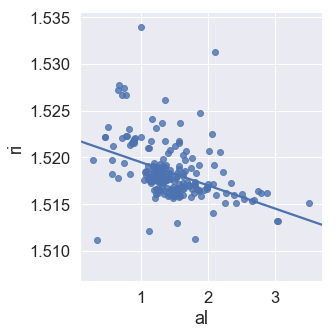

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.set(font_scale=1.5)
sb.lmplot(x='al',y='ri', data = glass, ci=None)

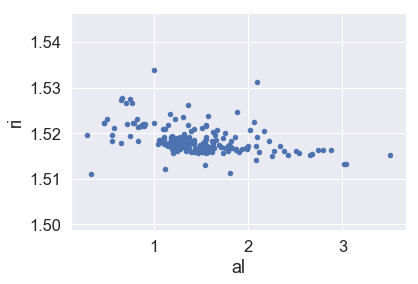

In [5]:
#let's plot scatter plot without using seaborn
glass.plot(kind = 'scatter', x='al', y='ri')

Text(0,0.5,'ri')

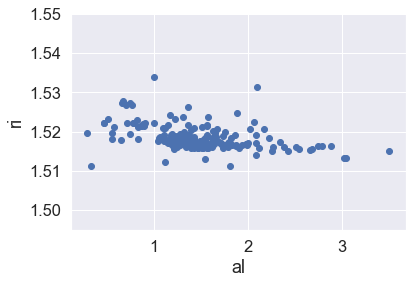

In [6]:
# equivalent scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [7]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
glass['re_pred'] = linreg.predict(X)

In [9]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,re_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


Text(0,0.5,'Predicted ri')

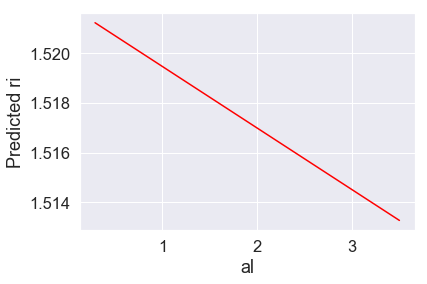

In [10]:
# plot those predictions connected by a line
plt.plot(glass.al, glass.re_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

Text(0,0.5,'ri')

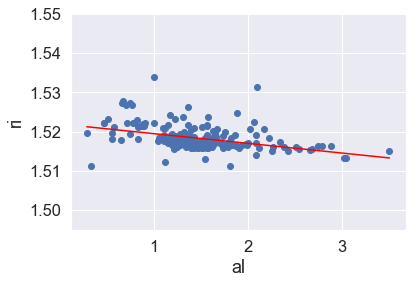

In [11]:
#puts the plot together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.re_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

In [12]:
#Refresher: interpreting linear regression coefficients
#Linear regression equation: y=β0+β1x

In [13]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

In [14]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([1.51699012])

In [15]:
print(set(zip(feature_cols, linreg.coef_)))

{('al', -0.0024776063874696235)}


In [16]:
#Interpretation: A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

In [17]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [18]:
# compute prediction for al=3 using the predict method
linreg.predict(3)

array([1.51451251])

# Part 2: Predicting a categorical response

In [19]:
#examine glass type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [20]:
#types 1, 2, 3 are window glass
#types 5, 6, 7 are household glass
glass['household'] =  glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,re_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Text(0,0.5,'household')

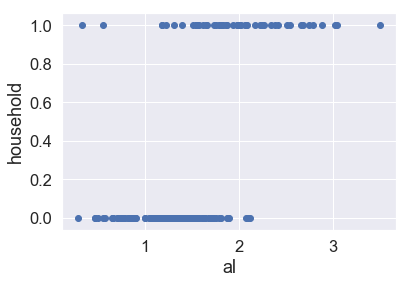

In [21]:
#Let's change our task, so that we're predicting household using al. 
#Let's visualize the relationship to figure out how to do this

plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [22]:
#fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

Text(0,0.5,'household')

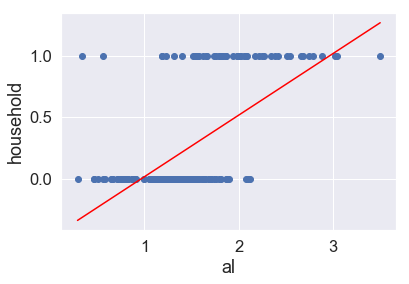

In [23]:
#scatter that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [24]:
#If al=3, what class do we predict for household? Class = 1

#If al=1.5, what class do we predict for household? Class = 0

#We predict the 0 class for lower values of al, and the 1 class for higher values of al. 
#What's our cutoff value? Around al=2, because that's where the linear regression line 
#crosses the midpoint between predicting class 0 and class 1.

#Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.


In [25]:
#np.where concept explained
import numpy as np
numbers = np.array([4, 14, 7])

# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(numbers > 7, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [26]:
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,re_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


In [27]:
glass.tail()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,re_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
193,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1.515033,1,0.912448,1
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1.514810,1,0.957554,1
173,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1.514463,1,1.027718,1
172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1.514413,1,1.037742,1
164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,1.513274,1,1.268283,1


Text(0,0.5,'household')

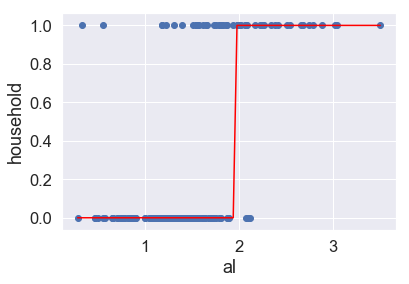

In [28]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

# Part 3: Using Logistic Regression Instead

# Logistic regression can do what we just did:

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

Text(0,0.5,'household')

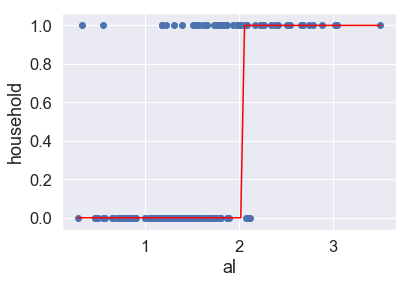

In [30]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [31]:
#What if we wanted the predicted probabilities instead of just the class predictions, 
#to understand how confident we are in a given prediction?

# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,re_pred,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0.028066
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0.030943
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.039820
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.039820
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0.043012


In [32]:
glass.tail()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,re_pred,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,,
193,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1.515033,1,0.912448,1,0.814989
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1.514810,1,0.957554,1,0.840740
173,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1.514463,1,1.027718,1,0.874932
172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1.514413,1,1.037742,1,0.879267
164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,1.513274,1,1.268283,1,0.948366


Text(0,0.5,'household')

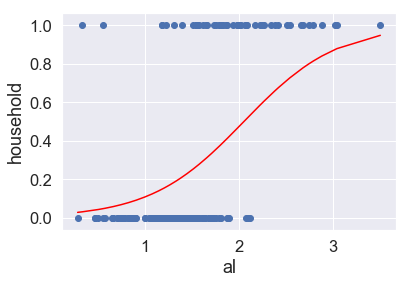

In [33]:
#plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [34]:
# examine some example predictions
print(logreg.predict_proba(0.5))
print(logreg.predict_proba(1))
print(logreg.predict_proba(1.5))
print(logreg.predict_proba(2))
print(logreg.predict_proba(2.5))
print(logreg.predict_proba(3))

[[0.9578078 0.0421922]]
[[0.89253652 0.10746348]]
[[0.75239392 0.24760608]]
[[0.52645662 0.47354338]]
[[0.28913886 0.71086114]]
[[0.12953623 0.87046377]]


In [35]:
#The first column indicates the predicted probability of class 0
#the second column indicates the predicted probability of class 1.

# Part 4: Probability, odds, e, log, log-odds

probability=one outcome /all outcomes

odds=one outcome /all other outcomes

#To make it simple.,

Dice roll of 1: probability = 1/6, odds = 1/5

Even dice roll: probability = 3/6, odds = 3/3 = 1

Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

odds=probability / 1−probability

probability=odds / 1+odds


In [36]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [37]:
#What is e? 
#It is the base rate of growth shared by all continually growing processes

np.exp(1)

2.718281828459045

In [38]:
# What is a (natural) log? 
# It gives you the time needed to reach a certain level of growth: 
# Here time needed to grow 1 unit to 2.718 units

np.log(2.718)

0.999896315728952

In [39]:
# add log-odds to the table

table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


In [40]:
# What is Logistic Regression?
#Logistic regression outputs the probabilities of a specific class
#Those probabilities can be converted into class predictions
#The logistic function has some nice properties:

#Takes on an "s" shape
#Output is bounded by 0 and 1

Text(0,0.5,'household')

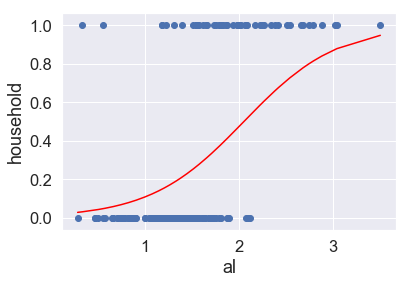

In [41]:
# Interpreting Logistic Regression Coefficients

plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [42]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([-0.10592543])

In [43]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([0.89949172])

In [44]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.47354338])

In [45]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([0.47354338])

In [46]:
# examine the coefficient for al
print(set(zip(feature_cols, logreg.coef_[0])))

{('al', 2.0109909641729433)}


In [47]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.9920580839167457

In [48]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([0.87046377])

In [49]:
# examine the intercept
logreg.intercept_

array([-4.12790736])

In [50]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.01586095])

In [51]:
# Using Logistic Regression with Categorical Features

In [52]:
# create a categorical feature
glass['high_ba'] = np.where(glass.ba > 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,re_pred,household,household_pred,household_pred_class,household_pred_prob,high_ba
id,,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0.028066,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0.030943,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.039820,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.039820,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0.043012,0


In [53]:
glass.tail()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,re_pred,household,household_pred,household_pred_class,household_pred_prob,high_ba
id,,,,,,,,,,,,,,,,
193,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1.515033,1,0.912448,1,0.814989,0
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1.514810,1,0.957554,1,0.840740,1
173,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1.514463,1,1.027718,1,0.874932,0
172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1.514413,1,1.037742,1,0.879267,0
164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,1.513274,1,1.268283,1,0.948366,1


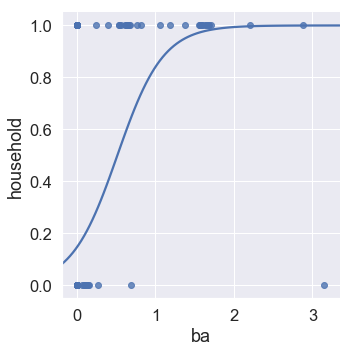

In [54]:
# original (continuous) feature
sb.lmplot(x='ba', y='household', data=glass, ci=None, logistic=True)

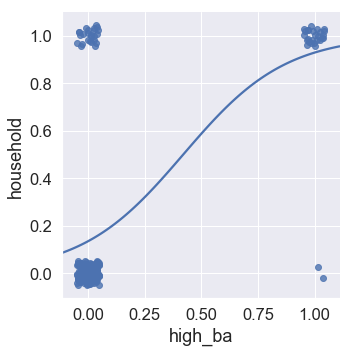

In [55]:
# categorical feature, with jitter added
sb.lmplot(x='high_ba', y='household', data=glass, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

In [56]:
# fit a logistic regression model
feature_cols = ['high_ba']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
# examine the coefficient for high_ba
print(set(zip(feature_cols, logreg.coef_[0])))

{('high_ba', 3.1471236134148928)}
